# AQI Prediction

This notebook demonstrates how to predict Air Quality Index (AQI) categories using a Random Forest model. The data is processed, the model is trained, and feature importance is visualized.

In [13]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath('../'))  # Use absolute path
from src.data_prosessing import process_data
from src.model_training import train_model, evaluate_model

## Load and Process Data

Load the sample AQI data and preprocess it to prepare for model training.

In [21]:
file_path = "../data/sample_aqi_data.csv"
X_train, X_test, y_train, y_test = process_data(file_path)
df=pd.read_csv(file_path)
df

,Temperature,Humidity,Wind_Speed,AQI,AQI_Bucket
0,27.483571,36.699303,0.494536,66.211891,Moderate
1,24.308678,34.182714,0.074825,74.147865,Moderate
2,28.238443,55.457210,0.228636,91.613994,Moderate
3,32.615149,58.259029,0.827581,74.728352,Moderate
4,23.829233,31.263446,3.244901,36.303617,Good
...,...,...,...,...,...
995,23.594499,41.227329,4.196848,59.222415,Moderate
996,33.988433,38.279703,0.986643,96.581302,Moderate
997,28.204214,50.662905,1.560729,56.702893,Moderate
998,22.144105,30.220232,6.888156,48.289673,Good


## Display Class Distribution

After applying SMOTE, we check the distribution of the classes.

Class distribution after SMOTE:
AQI_Bucket_Moderate                          795
AQI_Bucket_Unhealthy for Sensitive Groups    795
Name: count, dtype: int64


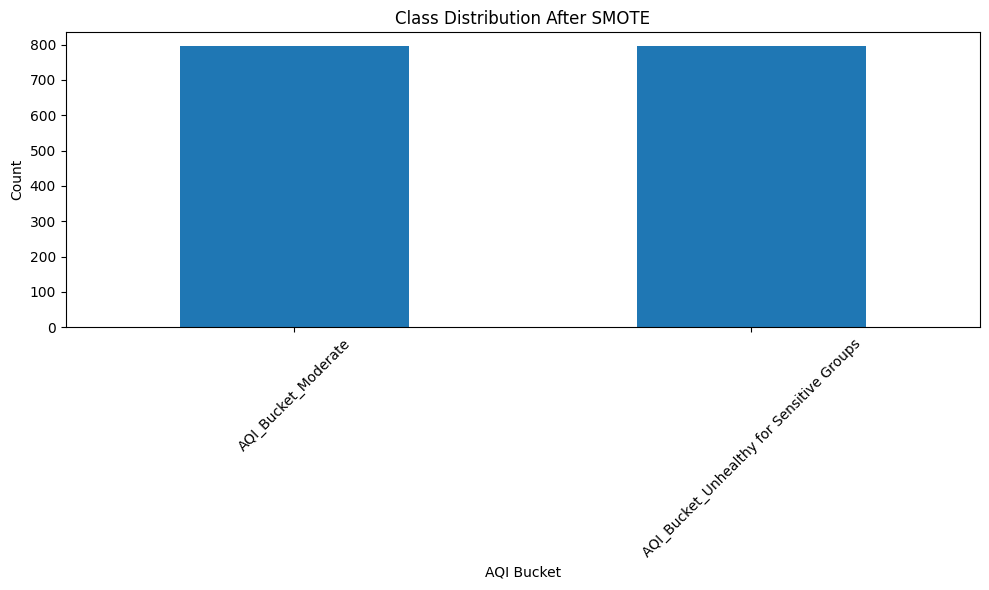

In [22]:
print("Class distribution after SMOTE:")
class_distribution = pd.Series(y_train).value_counts()
print(class_distribution)

plt.figure(figsize=(10, 6))
class_distribution.plot(kind='bar')
plt.title('Class Distribution After SMOTE')
plt.xlabel('AQI Bucket')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Train the Model

Now, we will train a Random Forest model on the processed training data.

In [23]:
model = train_model(X_train, y_train)

## Evaluate the Model

After training, we will evaluate the model's performance on the test data.

In [24]:
evaluate_model(model, X_test, y_test)

Confusion Matrix:
[[199   0]
 [  0   1]]

Classification Report:
                                           precision    recall  f1-score   support

                      AQI_Bucket_Moderate       1.00      1.00      1.00       199
AQI_Bucket_Unhealthy for Sensitive Groups       1.00      1.00      1.00         1

                                 accuracy                           1.00       200
                                macro avg       1.00      1.00      1.00       200
                             weighted avg       1.00      1.00      1.00       200



## Feature Importance

We will visualize the importance of each feature used in the model.

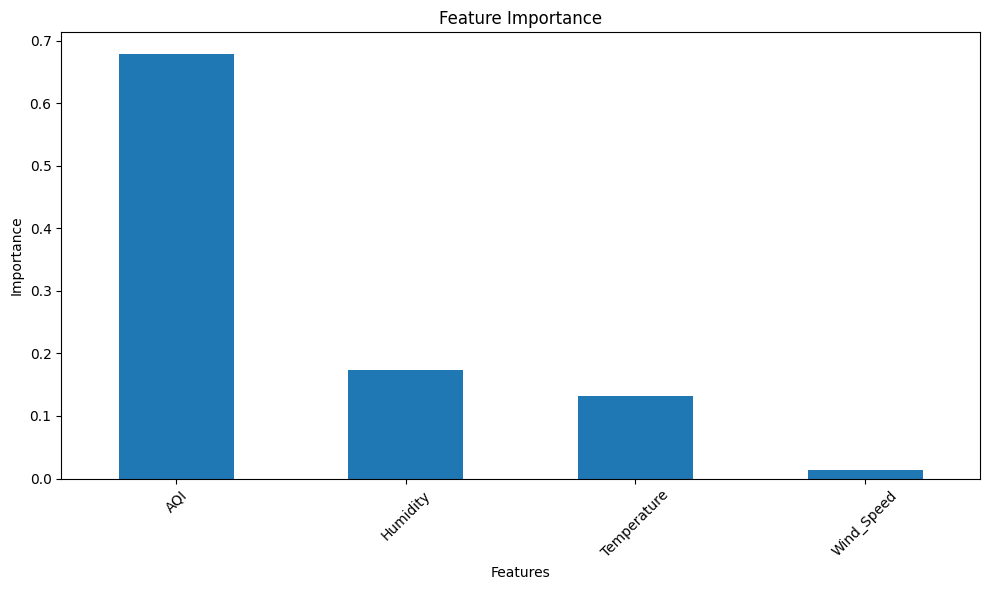

In [25]:
feature_importance = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()